In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [2]:
df = pd.read_csv("..\Data\sa2_votes.csv")

In [3]:
df.head()

,SA2_MAIN16,state,liberal/national coalition votes,australian labor party votes,totalvotes
0,101021007,NSW,655,850,1505
1,101021008,NSW,600,937,1537
2,101021009,NSW,7954,9937,17891
3,101021010,NSW,756,1040,1796
4,101021011,NSW,3023,3052,6075


In [19]:
gdf = df.groupby("state").sum()
gdf = gdf[["liberal/national coalition votes","australian labor party votes","totalvotes"]]
gdf["percent_lib"] = gdf["liberal/national coalition votes"] / gdf["totalvotes"]
gdf["percent_alp"] = gdf["australian labor party votes"] / gdf["totalvotes"]

In [21]:
gdf.head(10)

,liberal/national coalition votes,australian labor party votes,totalvotes,percent_lib,percent_alp
state,,,,,
ACT,84034,138705,222739,0.377276,0.622724
NSW,1991114,1867464,3858578,0.516023,0.483977
NT,37506,37825,75331,0.497883,0.502117
QLD,1320777,961623,2282400,0.578679,0.421321
SA,418239,439742,857981,0.487469,0.512531
TAS,129032,165394,294426,0.438249,0.561751
VIC,1372177,1571635,2943812,0.466122,0.533878
WA,613229,500464,1113693,0.550627,0.449373


In [140]:
states = sorted(list(gdf.index), reverse = True)

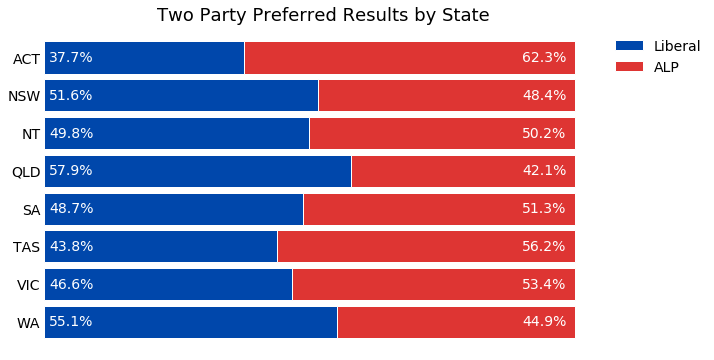

In [192]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"

for state in states:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(states) if x == state][0]
    
    # Calculate Lib/ALP TPP Percent by State
    lib_pct = gdf.loc[gdf.index == state, "percent_lib"].values.item(0) * 100
    alp_pct = gdf.loc[gdf.index == state, "percent_alp"].values.item(0) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(state, lib_pct, color = "#0047AB", edgecolor = "white", height = bar_height)
    axes.barh(state, alp_pct, left = lib_pct, color = "#DE3533", edgecolor = "white", height = bar_height)
    
    # Add Title
    axes.set_title("Two Party Preferred Results by State", fontsize = 18)
    
    # Remove spines
    axes.spines["right"].set_position(('data', 100))
    axes.spines["top"].set_visible(False)
    axes.spines["bottom"].set_visible(False)
    axes.spines["left"].set_visible(False)
    axes.spines["right"].set_visible(False)
    
    # Add vertical line to show 50%
    #axes.axvline(x = 50, color = "#A4A4A4", linestyle = "dashed", dashes = (5, 5))
    
    # Sort out the tick marks
    axes.xaxis.set_visible(False)
    
    # Remove tick marks
    axes.tick_params(axis = "both", length = 0, labelsize = 14)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct,1)) + "%", color = text_colour, va = "center", fontsize = 14)
    axes.text(90, position, s = str(round(alp_pct,1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
    box = axes.get_position()
    axes.set_position([box.x0, box.y0, box.width * 1, box.height])
    axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [267]:
fig.savefig("tpp_results_state.png", dpi = 300, bbox_inches = "tight")